In [ ]:


!pip install pulp ##Install pupl library



     |████████████████████████████████| 40.6MB 101kB/s 


In [ ]:
import pandas as pd
import numpy as np
from pulp import *

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('chalengge 1.csv')
df.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [ ]:
df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [ ]:
serving_size_conv = []
for i in df['Serving Size']:
    if '(' in i and 'g)' in i:
        serving_size_conv.append(float(i[i.find('(')+1:-3])) 
    elif 'fl oz' in i:
        serving_size_conv.append(float(i[0:i.find(' ')])*29.5735) ## assume 1 fl oz = 29.5735 g
    elif '(' and 'ml)':
        serving_size_conv.append(float(i[i.find('(')+1:-4])*1.04) ## assume 1 ml = 1.04g

df['Serving Size']= pd.DataFrame(serving_size_conv).astype('float')
df.head()



,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
serving_size_conv = []
for i in df['Serving Size']:
    if '(' in i and 'g)' in i:
        serving_size_conv.append(float(i[i.find('(')+1:-3])) 
    elif 'fl oz' in i:
        serving_size_conv.append(float(i[0:i.find(' ')])*29.5735) ## assume 1 fl oz = 29.5735 g
    elif '(' and 'ml)':
        serving_size_conv.append(float(i[i.find('(')+1:-4])*1.04) ## assume 1 ml = 1.04g

df['Serving Size']= pd.DataFrame(serving_size_conv).astype('float')



TypeError: ignored

In [ ]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.describe()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,376.234264,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,208.960847,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199.250000,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,354.882000,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,473.176000,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,946.352000,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [ ]:
df[['Serving Size','Calories']].describe()


,Serving Size,Calories
count,260.000000,260.000000
mean,376.234264,368.269231
std,208.960847,240.269886
min,29.000000,0.000000
25%,199.250000,210.000000
50%,354.882000,340.000000
75%,473.176000,500.000000
max,946.352000,1880.000000


In [ ]:
df.groupby('Category').sum()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Category,,,,,,,,,,,,,,,,,,,,,,
Beef & Pork,2909.00000,7410,3370,373.0,579,157.0,780,16.5,1310,434,15310,637,602,202,38,148,132,410,104,110,345,350
Beverages,14328.32065,3070,20,2.5,4,1.5,8,0.0,15,5,1120,47,778,259,1,2,752,36,20,634,80,8
Breakfast,8448.00000,22120,10455,1163.0,1792,447.5,2244,4.5,6420,2140,50865,2121,2090,696,137,539,347,834,291,374,679,720
Chicken & Fish,6568.00000,14930,6540,728.0,1116,166.5,840,3.5,2035,681,33960,1413,1325,441,79,319,198,786,552,341,417,442
Coffee & Tea,49387.74500,26970,6755,762.0,1174,467.5,2315,13.5,2590,891,13005,544,4230,1412,74,302,3763,842,1020,0,2688,204
Desserts,711.00000,1555,450,51.5,78,30.0,149,0.0,105,34,820,35,244,81,7,24,183,28,36,29,80,28
Salads,1632.00000,1620,650,70.5,110,22.5,111,0.0,310,104,3530,147,130,43,27,111,41,119,880,170,90,62
Smoothies & Shakes,12433.84300,14880,3575,395.5,608,234.5,1170,15.0,1260,412,5140,218,2532,844,41,161,2181,304,525,195,996,111
Snacks & Sides,1403.00000,3195,1230,137.0,211,35.0,174,0.0,240,81,5145,214,379,125,20,92,53,109,63,366,78,86


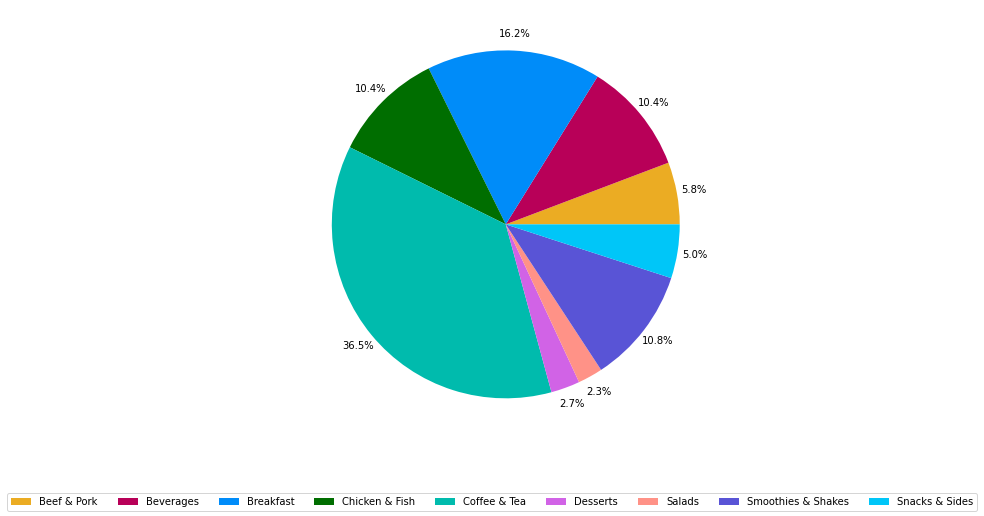

In [ ]:
category_count = pd.DataFrame({'Category':df['Category'].value_counts().index.tolist(),'Count':df['Category'].value_counts().tolist()})
category_count.sort_values('Category',inplace=True)
category_count.reset_index(drop=True,inplace=True)
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot()
labels = ['Beef & Pork','Beverages','Breakfast','Chicken & Fish','Coffee & Tea','Desserts','Salads','Smoothies & Shakes','Snacks & Sides']
colors = ['#ebac23', '#b80058','#008cf9' ,'#006e00','#00bbad','#d163e6', '#ff9287', '#5954d6', '#00c6f8', '#878500','#bdbdbd']

ax1.pie(category_count['Count'],colors = colors,autopct='%1.1f%%',pctdistance = 1.1)

fig.legend(labels,ncol=9,loc=8)

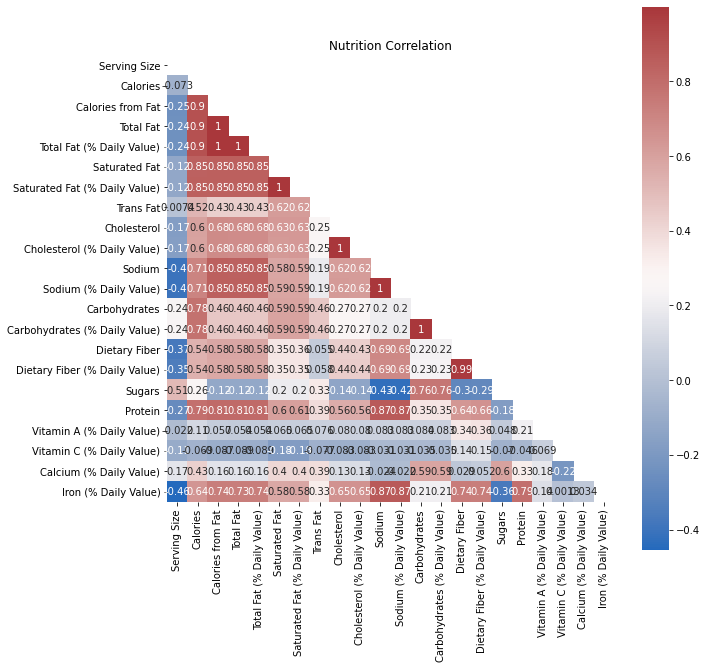

In [ ]:
header = df.columns.tolist()
nutrition = ['Serving Size',
 'Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

corr = df[nutrition].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr,
                 mask = mask,
                 square =True,
                 cmap="vlag",
                 annot=True
                )
ax.set_title("Nutrition Correlation");

Text(0.5, 0.98, 'Comparison between Total Calories and Total Item by Category')

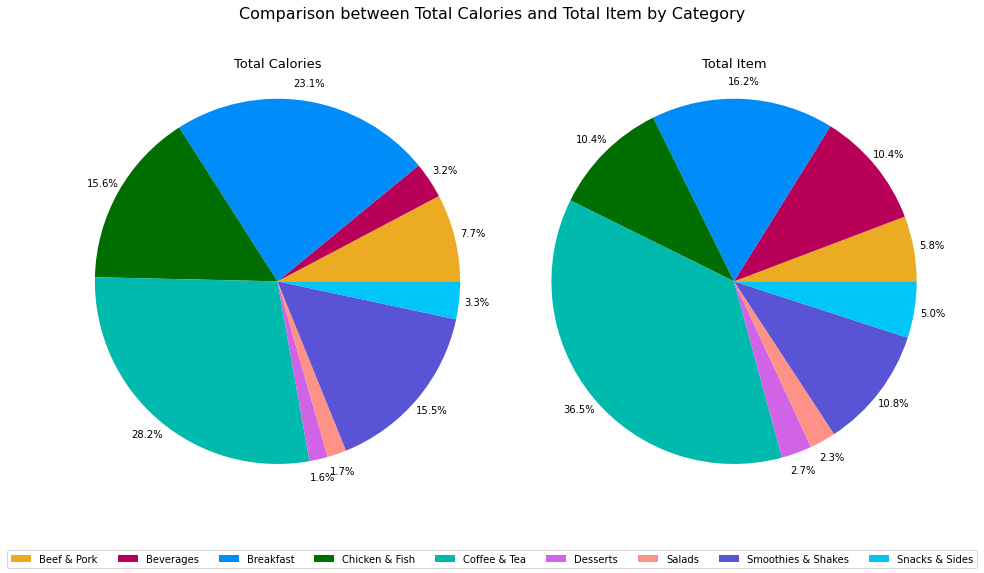

In [ ]:
calories_by_category = df[['Category','Calories']].groupby('Category',as_index=False).sum()
calories_by_category.sort_values('Category',inplace=True)
calories_by_category.reset_index(drop=True,inplace=True)

fig = plt.figure(figsize=(15,8))

ax1,ax2 = fig.subplots(1,2)
labels = ['Beef & Pork','Beverages','Breakfast','Chicken & Fish','Coffee & Tea','Desserts','Salads','Smoothies & Shakes','Snacks & Sides']
colors = ['#ebac23', '#b80058','#008cf9' ,'#006e00','#00bbad','#d163e6', '#ff9287', '#5954d6', '#00c6f8', '#878500','#bdbdbd']

ax1.pie(calories_by_category['Calories'],colors = colors,autopct='%1.1f%%',radius = 1.2,pctdistance = 1.1)
ax1.set_title('Total Calories',fontsize=13,pad=24)
ax2.pie(category_count['Count'],colors = colors,autopct='%1.1f%%',radius = 1.2,pctdistance = 1.1)
ax2.set_title('Total Item',fontsize=13,pad=24)

fig.legend(labels,ncol=9,loc=8)
fig.suptitle('Comparison between Total Calories and Total Item by Category',fontsize=16)

In [ ]:
crispy_vs_no = df[df['Item'].str.contains('Sandwich')].reset_index(drop=True)

crispy = crispy_vs_no[crispy_vs_no['Item'].str.contains('Crispy')].reset_index(drop=True)
grilled = crispy_vs_no[crispy_vs_no['Item'].str.contains('Grilled')].reset_index(drop=True)

label = grilled[grilled['Item'].str.contains('Grilled')]['Item'].replace('Grilled','',regex = True).tolist()

crispy.drop(['Category','Item','Serving Size'], axis=1,inplace = True)
grilled.drop(['Category','Item','Serving Size'], axis=1,inplace = True)

crispy_vs_no.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,213.0,510,200,22.0,33,3.5,18,0.0,45,16,990,41,55,18,3,13,10,24,4,6,15,20
1,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,200.0,350,80,9.0,13,2.0,9,0.0,65,22,820,34,42,14,3,13,8,28,4,8,15,20
2,Chicken & Fish,Premium Crispy Chicken Club Sandwich,249.0,670,300,33.0,51,9.0,44,0.0,85,29,1410,59,58,19,3,14,11,36,8,20,30,20
3,Chicken & Fish,Premium Grilled Chicken Club Sandwich,235.0,510,180,20.0,31,7.0,36,0.0,105,35,1250,52,44,15,3,13,9,40,8,20,30,20
4,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,230.0,610,250,28.0,43,6.0,31,0.0,70,24,1400,58,57,19,3,13,11,32,4,20,15,20


In [ ]:
def comparison(df_menu1,df_menu2,title):
    #no calories
    label1 = ['Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)'
              ,'Sodium (% Daily Value)','Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)'
             ,'Dietary Fiber (% Daily Value)','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)']
    
    label2 = ['Calories','Calories from Fat']
    legend1 = df_menu1['Item']
    data1 = df_menu1[label1].tolist()
    legend2 = df_menu2['Item']
    data2 = df_menu2[label1].tolist()
    
    n = len(label1)
    ind = np.arange(n)
    
    width = 0.3
    fig,ax = plt.subplots()
            
    
    fig.set_figheight(10)
    fig.set_figwidth(20)

    
    ax.bar(ind - width/2,data1,width,label = legend1)
    ax.bar(ind + width/2,data2,width,label = legend2)
    
    ax.set_xticks(ind)
    ax.set_xticklabels(label1)
    
    ax.tick_params(labelrotation=45)
    ax.legend()
    ax.set_title(title,fontsize=16)

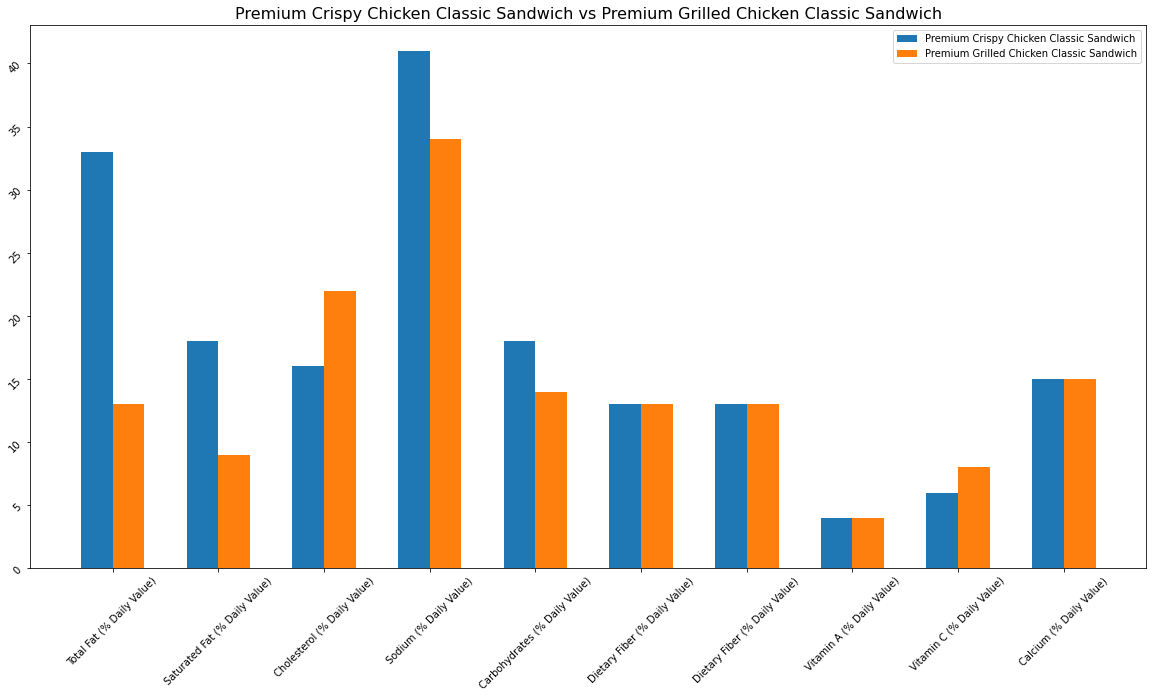

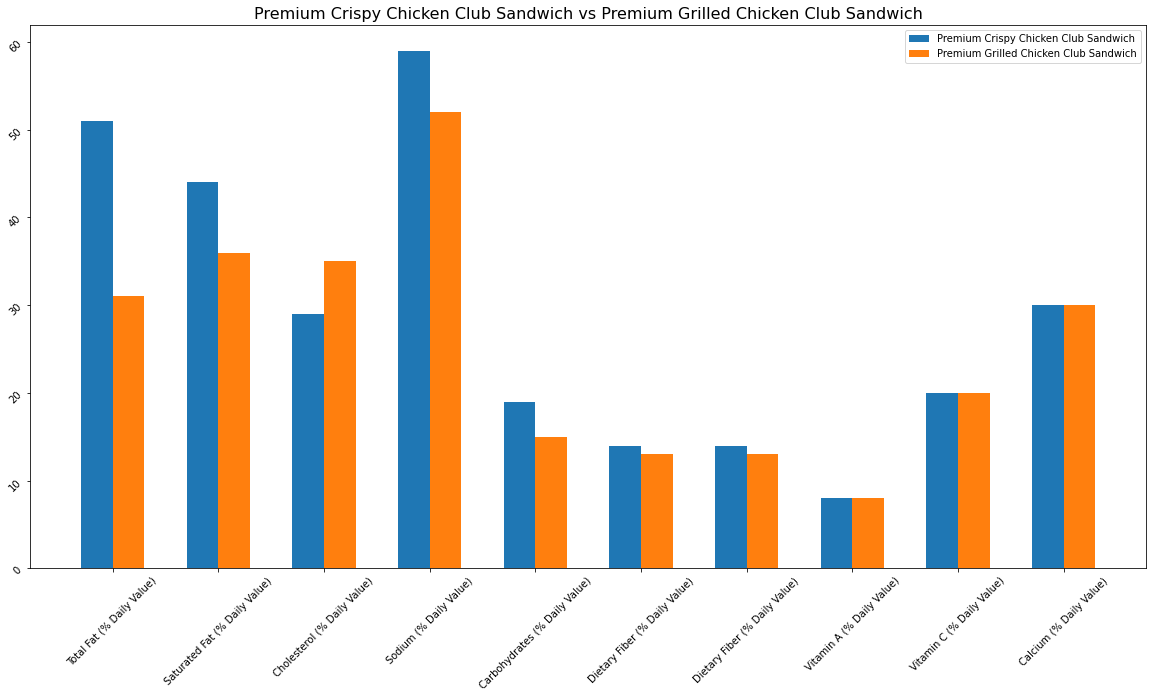

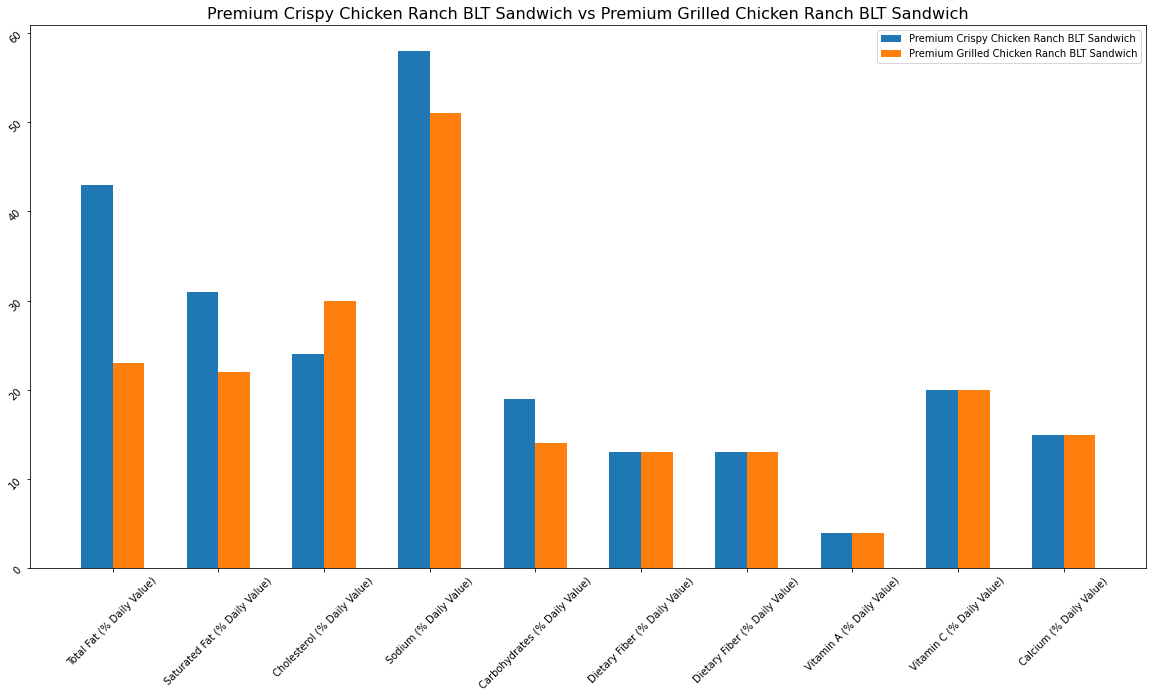

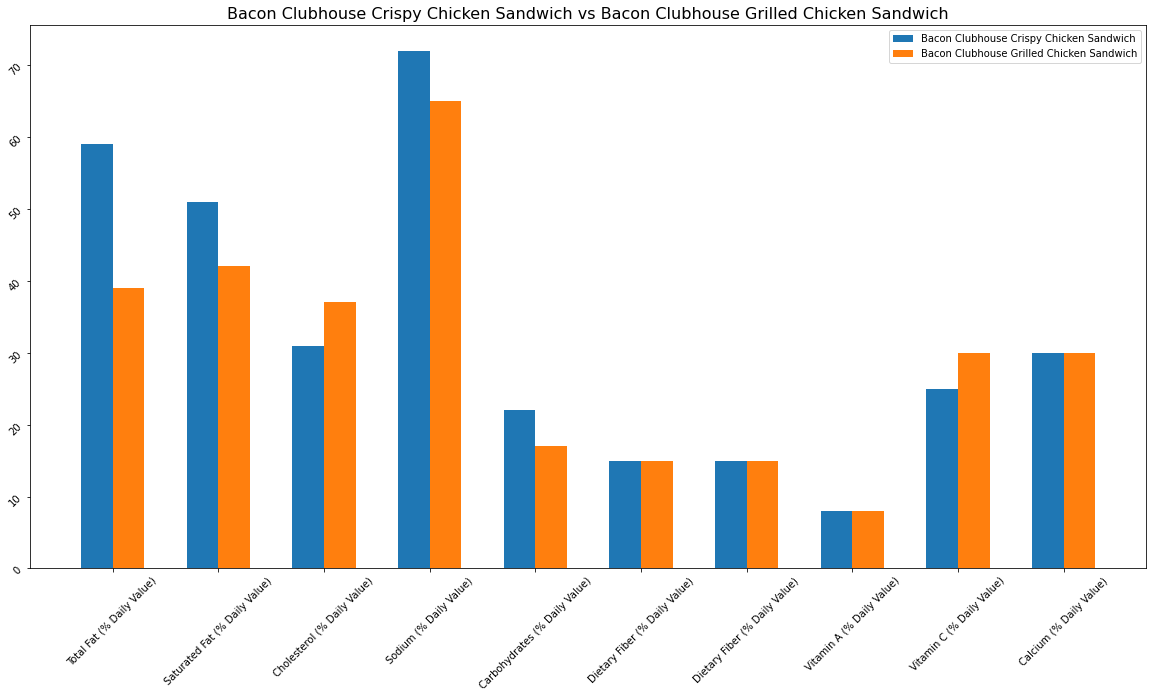

In [ ]:
for i in range(0,8,2):
    comparison(crispy_vs_no.loc[i],crispy_vs_no.loc[i+1],crispy_vs_no.loc[i][1]+" vs "+crispy_vs_no.loc[i+1][1])

In [ ]:
def LPModel(threshold,tolerant=0,morethan = True, lessthan = False):
    prob = LpProblem("McDonalds Problem",LpMinimize)

    food_item = df['Item'].to_list()

    costs = dict(zip(food_item,[1]*len(food_item))) ##bobot/harga pada setiap item diabaikan

    calories = dict(zip(food_item,df['Calories']*100/2500)) ##assumes daily calories needs is 2500

    fat = dict(zip(food_item,df['Total Fat (% Daily Value)']))

    sat_fat = dict(zip(food_item,df['Saturated Fat (% Daily Value)']))

    cholesterol = dict(zip(food_item,df['Cholesterol (% Daily Value)']))

    sodium = dict(zip(food_item,df['Sodium (% Daily Value)']))

    carbs = dict(zip(food_item,df['Carbohydrates (% Daily Value)']))

    dietary_fiber = dict(zip(food_item,df['Dietary Fiber (% Daily Value)']))

    sugar = dict(zip(food_item,df['Sugars']*100/30)) ##assumes daily sugar needs is 30

    protein = dict(zip(food_item,df['Protein']*100/50)) ##assumes daily protein needs is 50

    vit_a = dict(zip(food_item,df['Vitamin A (% Daily Value)']))

    vit_c = dict(zip(food_item,df['Vitamin C (% Daily Value)']))

    calcium = dict(zip(food_item,df['Calcium (% Daily Value)']))

    iron = dict(zip(food_item,df['Iron (% Daily Value)']))

    food_vars = LpVariable.dicts('Menu',food_item,lowBound=0,cat='Integer') #We cannot order a half of big mac ofc, set minimum order to 0

    prob += lpSum([costs[i]*food_vars[i] for i in food_item])
    
    i = threshold
    b = tolerant
    
    ##Set Constrains
    if lessthan:
        prob += lpSum([calories[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([fat[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([sat_fat[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([cholesterol[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([sodium[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([carbs[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([dietary_fiber[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([sugar[f]* food_vars[f] for f in food_item])<= i+b
        prob += lpSum([protein[f]* food_vars[f] for f in food_item])<= i+b
        prob += lpSum([vit_a[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([vit_c[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([calcium[f] * food_vars[f] for f in food_item]) <= i+b
        prob += lpSum([iron[f] * food_vars[f] for f in food_item]) <= i+b
        
    if morethan:
        prob += lpSum([calories[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([fat[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([sat_fat[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([cholesterol[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([sodium[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([carbs[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([dietary_fiber[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([sugar[f]* food_vars[f] for f in food_item])>= i-b
        prob += lpSum([protein[f]* food_vars[f] for f in food_item])>= i-b
        prob += lpSum([vit_a[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([vit_c[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([calcium[f] * food_vars[f] for f in food_item]) >= i-b
        prob += lpSum([iron[f] * food_vars[f] for f in food_item]) >= i-b

    prob.solve()
    
    print("Status:", LpStatus[prob.status])
    
    ideal_item_name = []
    ideal_item_count = []
    for v in prob.variables():
        if v.varValue>0:
            ideal_item_name.append(v.name)
            ideal_item_count.append(v.varValue)
    dic = {'Items':ideal_item_name,
          'Count':ideal_item_count}
    df_opt = pd.DataFrame(dic)
    df_opt.replace('Menu_','',inplace = True,regex=True)
    df_opt.replace("_", " ",inplace = True,regex=True)
    
    return df_opt

In [ ]:
df_opt = LPModel(100,morethan = True, lessthan = False)
df_opt

Status: Optimal


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1195: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


,Items,Count
0,Big Breakfast with Hotcakes (Large Biscuit),3.0
1,Fruit & Maple Oatmeal without Brown Sugar,1.0
2,Premium Southwest Salad with Grilled Chicken,1.0


In [ ]:
df_ideal = pd.DataFrame(columns = header)

for i in range(df_opt.shape[0]):
    df_ideal = df_ideal.append(df[df['Item'] == df_opt['Items'][i]])
    df_ideal.reset_index(drop = True,inplace = True)
    df_ideal.loc[i,'Serving Size':'Iron (% Daily Value)']*=df_opt['Count'][i]
df_ideal

NameError: ignored